# Customer Clustering
Clustering customers based on their "lifestyle" segment relating to how they like to interact with us - e.g. for parties, stocking up, little and often, exploring etc

**** Note ****
Data has been randomly modified for the purpose of publishing this project publicly

## Import the data from Redshift

In [1]:
#Import packages
import pandas as pd
import json
import psycopg2
import os
import numpy as np
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt

In [2]:
#SQL to extract data from the DWH
sql = """select a.customer_code::numeric as uid,
round(count(distinct b.order_id) * random(),0) as orders,
round(count(distinct case when b.event_type = 'Event' then b.order_id else null end) * random(),0) as event_orders,
floor(sum(b.sale_price_ex_vat) * random()) as sales,
ceiling(sum(b.quantity) * random()) as quantity,
round(count(distinct b.product_code) * random()) as unique_skus,
floor((count(distinct c.order_id)::numeric(9,3) + 
	count(distinct case when d.voucher_code is not null then d.order_id else null end)) * random()) as orders_with_voucher	
from warehouse.d_customers_new a
inner join warehouse.d_order_products_new b
on a.customer_code = b.customer_code
inner join warehouse.d_orders_new d
on b.order_id = d.order_id
left join warehouse.d_vouchers_redeemed_new c
on b.order_id = c.order_id
where a.customer_type = 'Retail'
and b.product_group not in ('33')
and b.order_type <> 'Refund'
and left(lpad(a.customer_code,9,'0'),3) not in ('701','702','703','750')
and a.customer_status <> 'Lapsed'
and b.transaction_date > current_date - 720
group by a.customer_code
"""


In [3]:
#import connection details from .env file

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)


servername = os.environ['REDSHIFT_DWH_ENDPOINT']
database = os.environ['REDSHIFT_DWH_DATABASE']
port = os.environ['REDSHIFT_DWH_PORT']
username = os.environ['REDSHIFT_DWH_USERNAME']
password = os.environ['REDSHIFT_DWH_PASSWORD']

#print (database,servername,port,username,password)

In [4]:
############# Fetch Data ###################

#print(sql)
con= psycopg2.connect(dbname= database, host= servername,port= port,user= username,password= password)
cur = con.cursor()
cur.execute(sql) ##e.g. select some data. Triple quotation for multi line strings.
data_list = cur.fetchall() ## Fetch the results into a data frame

# Extract the column names
col_names = []
for elt in cur.description:
    col_names.append(elt[0])

cur.close() ## Close cursor
con.close() ## close connection

In [5]:
#Convert to pandas df
df = pd.DataFrame(data_list,columns = col_names)
#Swap index for customer_code
df.set_index('uid')

orders  event_orders  sales  quantity  unique_skus  \
uid                                                             
248385156     1.0           0.0    6.0       2.0          1.0   
254909260     1.0           1.0   48.0      22.0          2.0   
194225795     0.0           0.0    5.0       1.0          1.0   
168346712     1.0           0.0   57.0       4.0          5.0   
247349895     0.0           0.0   12.0       2.0          1.0   
189227099     1.0           0.0   12.0       1.0          1.0   
131300542     1.0           0.0   54.0       1.0          9.0   
398354869     1.0           0.0   90.0       5.0          1.0   
137346739     1.0           0.0   26.0       2.0          2.0   
92108607      2.0           0.0   87.0       7.0          1.0   
177350940     1.0           0.0    1.0       1.0          0.0   
398355389     1.0           0.0   67.0       5.0          4.0   
123359034     1.0           0.0    1.0       1.0          0.0   
152360235     1.0           0.0    0.0       1.0          1.0   
205358035     2.0           0.0   35.0       2.0          3.0   
112365683     1.0           0.0   12.0       1.0          2.0   
224365439     1.0           0.0   22.0       1.0          1.0   
82342905      4.0           0.0   16.0       2.0          1.0   
208371031     1.0           0.0   24.0       2.0          0.0   
398340088     0.0           0.0   55.0       7.0          4.0   
24063615      0.0           0.0  162.0      17.0          3.0   
261220617     1.0           0.0    0.0       8.0          2.0   
185123168     0.0           0.0   28.0       4.0          1.0   
190221151     1.0           1.0  116.0       8.0          3.0   
159226865     0.0           0.0    3.0       6.0          0.0   
258222141     0.0           0.0    4.0       2.0          0.0   
398371222     1.0           0.0  338.0      28.0          1.0   
97226334      3.0           0.0   32.0       1.0          2.0   
169341208     1.0           0.0  729.0       9.0          0.0   
31018509      2.0           0.0   94.0      10.0          2.0   
...           ...           ...    ...       ...          ...   
498495403     0.0           0.0   93.0       1.0          1.0   
36495681      1.0           0.0    2.0       1.0          0.0   
960003580     0.0           0.0    0.0       1.0          0.0   
960002477     1.0           0.0    5.0       6.0          0.0   
114496882     0.0           0.0   30.0       2.0          1.0   
498497209     0.0           0.0    6.0       8.0          2.0   
168486576     1.0           0.0    6.0       1.0          1.0   
298201736     0.0           0.0    6.0       5.0          0.0   
498491120     1.0           0.0   59.0       1.0          0.0   
263496352     1.0           0.0   18.0       1.0          1.0   
25205103      0.0           0.0    4.0       4.0          5.0   
960002232     0.0           0.0   24.0       2.0          2.0   
187102171     1.0           0.0  177.0       6.0          1.0   
498497487     1.0           0.0   28.0       4.0          0.0   
498493686     1.0           0.0   74.0      11.0          4.0   
498486581     1.0           0.0   42.0      69.0          1.0   
960004055     0.0           0.0   25.0       4.0          3.0   
498484043     1.0           0.0   21.0       5.0          1.0   
960004190     1.0           0.0   47.0       4.0          2.0   
498484487     0.0           0.0   50.0       4.0          1.0   
498494852     1.0           0.0   27.0       4.0          0.0   
163486649     1.0           0.0    8.0       1.0          0.0   
190486751     1.0           0.0   21.0       2.0          3.0   
185485709     1.0           0.0   50.0       2.0          3.0   
498493987     1.0           0.0    0.0       1.0          1.0   
498489373     1.0           0.0   43.0       2.0          2.0   
398752636     0.0           0.0   24.0       1.0          2.0   
113104886     0.0           0.0    7.0       6.0          5.0   
205120980     0.0           0.0   17.0       6

In [6]:
## We're only interested in customers who have placed at least 3 orders, so strip them out
df = df[df.orders >=3]

In [7]:
#Output the data to file
raw_data_file_path = os.path.join(os.path.pardir,'data','raw')
raw_data_file_name = os.path.join(raw_data_file_path,'raw_customer_data.csv')

In [8]:
df.to_csv(raw_data_file_name)

### Write script to file to produce raw data:

In [9]:
raw_data_script_file_path = os.path.join(os.path.pardir,'src','data')
raw_data_script_file_name = os.path.join(raw_data_script_file_path,'get_raw_customer_data.py')

In [10]:
%%writefile $raw_data_script_file_name

#Import packages
import pandas as pd
import json
import psycopg2
import os
import logging
from dotenv import find_dotenv, load_dotenv

log_fmt = '%(asctime)s - %(names)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format = log_fmt)

#SQL to extract data from the DWH
sql = """select a.customer_code::numeric as uid,
round(count(distinct b.order_id) * random(),0) as orders,
round(count(distinct case when b.event_type = 'Event' then b.order_id else null end) * random(),0) as event_orders,
floor(sum(b.sale_price_ex_vat) * random()) as sales,
ceiling(sum(b.quantity) * random()) as quantity,
round(count(distinct b.product_code) * random()) as unique_skus,
floor((count(distinct c.order_id)::numeric(9,3) + 
	count(distinct case when d.voucher_code is not null then d.order_id else null end)) * random()) as orders_with_voucher	
from warehouse.d_customers_new a
inner join warehouse.d_order_products_new b
on a.customer_code = b.customer_code
inner join warehouse.d_orders_new d
on b.order_id = d.order_id
left join warehouse.d_vouchers_redeemed_new c
on b.order_id = c.order_id
where a.customer_type = 'Retail'
and b.product_group not in ('33')
and b.order_type <> 'Refund'
and left(lpad(a.customer_code,9,'0'),3) not in ('701','702','703','750')
and a.customer_status <> 'Lapsed'
and b.transaction_date > current_date - 720
group by a.customer_code
"""

#import connection details from connections json
def get_creds():
    dotenv_path = find_dotenv()
    load_dotenv(dotenv_path)
    servername = os.environ['REDSHIFT_DWH_ENDPOINT']
    database = os.environ['REDSHIFT_DWH_DATABASE']
    port = os.environ['REDSHIFT_DWH_PORT']
    username = os.environ['REDSHIFT_DWH_USERNAME']
    password = os.environ['REDSHIFT_DWH_PASSWORD']
    credentials = {'servername': servername, 'database': database, 'port':port, 'username':username,'password':password}
    return credentials #pass out creds as dict

#print (database,servername,port,username,password)

#print(sql)
def connect(credentials):
    con= psycopg2.connect(dbname= credentials['database'], host= credentials['servername'],
                        port= credentials['port'],user= credentials['username'],password= credentials['password'])
    cur = con.cursor()
    cur.execute(sql) ##e.g. select some data. Triple quotation for multi line strings.
    data_list = cur.fetchall() ## Fetch the results into a data frame

    # Extract the column names
    col_names = []
    for elt in cur.description:
        col_names.append(elt[0])
    cur.close() ## Close cursor
    con.close() ## close connection
    data_dict = {'data': data_list, 'col_names':col_names}
    return data_dict #pass out results as dict

#To pandas df
def to_df(data_dict):
    #Convert to pandas df
    df = pd.DataFrame(data_dict['data'],columns = data_dict['col_names'])
    #Swap index for customer_code
    df.set_index('uid')
    ## We're only interested in customers who have placed at least 3 orders, so strip them out
    df = df[df.orders >=3]
    return df

#Output the data
def output_to_csv(df):
    #Output the data to file
    raw_data_file_path = os.path.join(os.path.pardir,'data','raw')
    raw_data_file_name = os.path.join(raw_data_file_path,'raw_customer_data.csv')
    df.to_csv(raw_data_file_name, index=False)

if __name__ == "__main__":
    credentials = get_creds()
    data_dict = connect(credentials)
    df = to_df(data_dict)
    output_to_csv(df)

Overwriting ..\src\data\get_raw_customer_data.py


In [11]:
#Confirm that the script runs and output data
! python ..\\src\\data\\get_raw_customer_data.py

### Reimport the raw data from CSV:

In [12]:
raw_data_file_path = os.path.join(os.path.pardir,'data','raw')
raw_data_file_name = os.path.join(raw_data_file_path,'raw_customer_data.csv')

In [14]:
df = pd.read_csv(raw_data_file_name,index_col='uid')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296082 entries, 31110365 to 398911308
Data columns (total 6 columns):
orders                 296082 non-null float64
event_orders           296082 non-null float64
sales                  296082 non-null float64
quantity               296082 non-null float64
unique_skus            296082 non-null float64
orders_with_voucher    296082 non-null float64
dtypes: float64(6)
memory usage: 15.8 MB


## EDA

In [16]:
df.describe()

orders   event_orders          sales       quantity  \
count  296082.000000  296082.000000  296082.000000  296082.000000   
mean        7.607828       0.108973     650.000020     101.252379   
std         8.128138       0.535319    1047.428067     177.256927   
min         3.000000       0.000000     -16.000000       1.000000   
25%         3.000000       0.000000     127.000000      19.000000   
50%         5.000000       0.000000     332.000000      50.000000   
75%         9.000000       0.000000     766.000000     117.000000   
max       958.000000      31.000000   92996.000000   13619.000000   

         unique_skus  orders_with_voucher  
count  296082.000000        296082.000000  
mean       16.060115             0.192399  
std        19.266218             0.797789  
min         0.000000             0.000000  
25%         4.000000             0.000000  
50%        10.000000             0.000000  
75%        21.000000             0.000000  
max       437.000000            47.000000

In [17]:
#orders and sales has a very high max, these are probably commercial customers
#we should probably exclude anyone who has shopped more than 50 times pa

#Lets review:
df[df.orders >= 100].count()

orders                 188
event_orders           188
sales                  188
quantity               188
unique_skus            188
orders_with_voucher    188
dtype: int64

In [19]:
#Lets exclude these customers, likely commercial / staff, only represent 1% of the data
df = df[df.orders <=100]
df.orders.max()

100.0

In [20]:
df.describe()

orders   event_orders          sales       quantity  \
count  295899.000000  295899.000000  295899.000000  295899.000000   
mean        7.519711       0.108767     648.320353     100.913116   
std         6.998586       0.533647    1042.443588     175.838987   
min         3.000000       0.000000     -16.000000       1.000000   
25%         3.000000       0.000000     127.000000      19.000000   
50%         5.000000       0.000000     331.000000      50.000000   
75%         9.000000       0.000000     765.000000     117.000000   
max       100.000000      31.000000   92996.000000   13619.000000   

         unique_skus  orders_with_voucher  
count  295899.000000        295899.000000  
mean       16.006965             0.192069  
std        19.015348             0.796449  
min         0.000000             0.000000  
25%         4.000000             0.000000  
50%        10.000000             0.000000  
75%        21.000000             0.000000  
max       437.000000            47.000000

In [21]:
#What about really high sales values
df[df.sales >= 30000].head()

orders  event_orders    sales  quantity  unique_skus  \
uid                                                               
32109435      6.0           4.0  32533.0     203.0          3.0   
130109108     4.0           0.0  56399.0    3360.0          2.0   
196223386     3.0           1.0  44672.0    3349.0         59.0   
198222925    13.0           2.0  92996.0   13619.0         92.0   
398348324    10.0           3.0  46441.0    3911.0         19.0   

           orders_with_voucher  
uid                             
32109435                   0.0  
130109108                  0.0  
196223386                  1.0  
198222925                  2.0  
398348324                  0.0

In [22]:
#Exclude customers with ultra high value sales:
df = df[df.sales <= 30000]

In [23]:
df.describe()

orders   event_orders          sales       quantity  \
count  295889.000000  295889.000000  295889.000000  295889.000000   
mean        7.519516       0.108693     646.860143     100.768021   
std         6.998459       0.533383    1006.188373     172.565194   
min         3.000000       0.000000     -16.000000       1.000000   
25%         3.000000       0.000000     127.000000      19.000000   
50%         5.000000       0.000000     331.000000      50.000000   
75%         9.000000       0.000000     765.000000     117.000000   
max       100.000000      31.000000   29793.000000   10728.000000   

         unique_skus  orders_with_voucher  
count  295889.000000        295889.000000  
mean       16.005958             0.192028  
std        19.013973             0.796350  
min         0.000000             0.000000  
25%         4.000000             0.000000  
50%        10.000000             0.000000  
75%        21.000000             0.000000  
max       437.000000            47.000000

In [24]:
%matplotlib inline

In [25]:
#large sku to high end
df.boxplot('orders');

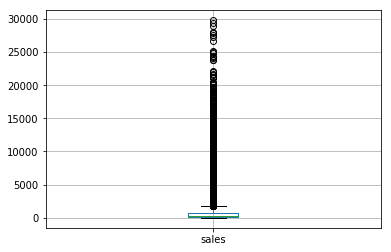

In [26]:
#Huge skew on the data towards the high end
df.boxplot('sales');

In [27]:
df.orders.plot(kind = 'hist',bins = 20,color = 'c',alpha=0.5);

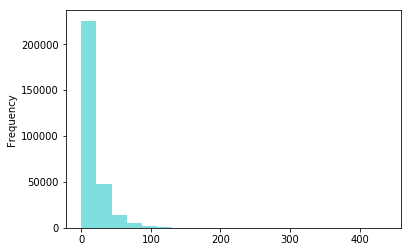

In [28]:
df.unique_skus.plot(kind='hist',bins=20,color='c',alpha=0.5);

In [29]:
#What about negative bottles:
df[df.quantity <= -200]

Empty DataFrame
Columns: [orders, event_orders, sales, quantity, unique_skus, orders_with_voucher]
Index: []

In [31]:
#Exclude these as very small number of customers
df = df[(df.quantity >= -200) & (df.quantity<=6000)]

In [32]:
df.describe()

orders   event_orders          sales       quantity  \
count  295881.000000  295881.000000  295881.000000  295881.000000   
mean        7.519290       0.108652     646.610465     100.556051   
std         6.997625       0.533243    1003.949375     167.491859   
min         3.000000       0.000000     -16.000000       1.000000   
25%         3.000000       0.000000     127.000000      19.000000   
50%         5.000000       0.000000     331.000000      50.000000   
75%         9.000000       0.000000     765.000000     117.000000   
max       100.000000      31.000000   29793.000000    5971.000000   

         unique_skus  orders_with_voucher  
count  295881.000000        295881.000000  
mean       16.005789             0.192016  
std        19.014125             0.796349  
min         0.000000             0.000000  
25%         4.000000             0.000000  
50%        10.000000             0.000000  
75%        21.000000             0.000000  
max       437.000000            47.000000

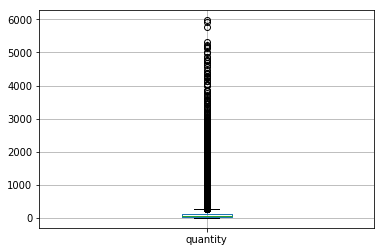

In [33]:
#reduced, but still v large sku
df.boxplot('quantity');

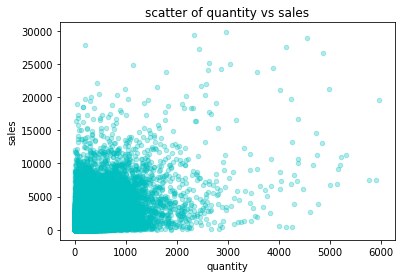

In [35]:
df.plot.scatter(x='quantity',y='sales',alpha=0.3,color = 'c',title='scatter of quantity vs sales');

## Feature Engineering
We want to express e.g. vouchers as a percentage of orders placed, and unique skus as a pc of quantity purchased etc
Although not necessary for clustering, it helps to normalise data and express in a more intuitive manner:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295881 entries, 31110365 to 398911308
Data columns (total 13 columns):
orders                    295881 non-null float64
event_orders              295881 non-null float64
sales                     295881 non-null float64
quantity                  295881 non-null float64
unique_skus               295881 non-null float64
orders_with_voucher       295881 non-null float64
bpo                       295881 non-null float64
abp                       295881 non-null float64
pc_unique_skus            295881 non-null float64
pc_orders_with_voucher    295881 non-null float64
pc_event_orders           295881 non-null float64
qpo                       295881 non-null float64
aqp                       295881 non-null float64
dtypes: float64(13)
memory usage: 31.6 MB


In [40]:
# create BPO, ABP, unique_skus_pc, pc_orders_with_voucher, pc_event_orders
# can use method chaining here when building the build script

#create bpo
#use np.where to set default values where divide by zero
df['qpo'] = df.quantity / df.orders
#and abp
df['aqp'] = np.where(df.quantity != 0, df.sales / df.quantity,0)
#and unique_skus_pc
df['pc_unique_skus'] = np.where(df.quantity !=0, df.unique_skus / df.quantity,0)
#and pc_orders_with_voucher
df['pc_orders_with_voucher'] = df.orders_with_voucher/df.orders
#and event pc_event_orders
df['pc_event_orders'] = df.event_orders/df.orders

df.head()

orders  event_orders  sales  quantity  unique_skus  \
uid                                                             
31110365      6.0           0.0  568.0      35.0          1.0   
72204593      3.0           0.0  126.0      11.0          6.0   
36203025      3.0           1.0  601.0      35.0          0.0   
165228922     7.0           0.0   22.0       6.0          1.0   
15003179      4.0           0.0  204.0      38.0         11.0   

           orders_with_voucher        bpo        abp  pc_unique_skus  \
uid                                                                    
31110365                   0.0   5.833333  16.228571        0.028571   
72204593                   0.0   3.666667  11.454545        0.545455   
36203025                   0.0  11.666667  17.171429        0.000000   
165228922                  4.0   0.857143   3.666667        0.166667   
15003179                   0.0   9.500000   5.368421        0.289474   

           pc_orders_with_voucher  pc_event_orders        qpo        aqp  
uid                                                                       
31110365                 0.000000         0.000000   5.833333  16.228571  
72204593                 0.000000         0.000000   3.666667  11.454545  
36203025                 0.000000         0.333333  11.666667  17.171429  
165228922                0.571429         0.000000   0.857143   3.666667  
15003179                 0.000000         0.000000   9.500000   5.368421

In [41]:
# Create a subset of the columns we want to cluster on:
#ABP, BPO and orders will cover sales ex vat and bottles (should co correlate) - we can check this

### Confirm co-correlated columns

columns = ['orders','aqp','qpo','pc_unique_skus','pc_orders_with_voucher','pc_event_orders']

In [42]:
#Cutdown df
df2 = df[columns]

In [44]:
df2.describe()

orders            aqp            qpo  pc_unique_skus  \
count  295881.000000  295881.000000  295881.000000   295881.000000   
mean        7.519290      19.261774      15.360171        0.654767   
std         6.997625      76.004663      27.149396        2.201500   
min         3.000000      -1.142857       0.013889        0.000000   
25%         3.000000       3.000000       3.666667        0.071212   
50%         5.000000       6.586667       8.500000        0.196721   
75%         9.000000      14.029851      17.571429        0.500000   
max       100.000000   11742.000000    1671.000000      178.000000   

       pc_orders_with_voucher  pc_event_orders  
count           295881.000000    295881.000000  
mean                 0.030877         0.018292  
std                  0.134203         0.092266  
min                  0.000000         0.000000  
25%                  0.000000         0.000000  
50%                  0.000000         0.000000  
75%                  0.000000         0.000000  
max                  5.750000         6.000000

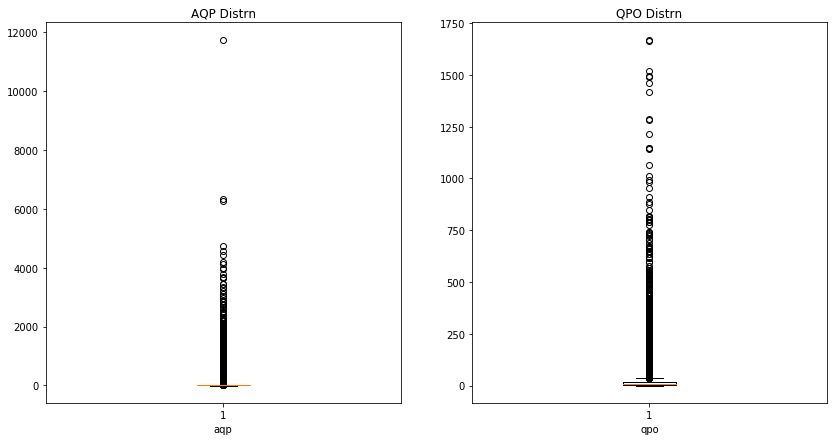

In [45]:
## Plot ABP and BPO using subplots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7)) 

ax1.boxplot(df.abp)
ax1.set_title("AQP Distrn")
ax1.set_xlabel("aqp")
ax2.boxplot(df.bpo)
ax2.set_title("QPO Distrn")
ax2.set_xlabel("qpo")
plt.show()

In [46]:
#Lets exclude the outliers for APP and BPO, down to £100 ABP and 1250 BPO
df[df.aqp >= 100]

orders  event_orders   sales  quantity  unique_skus  \
uid                                                              
254221585     4.0           0.0   291.0       2.0         15.0   
36111039      6.0           0.0   873.0       5.0        106.0   
131105067     5.0           1.0   819.0       6.0         14.0   
79202607      3.0           2.0  4469.0      39.0         17.0   
197222517     3.0           0.0   213.0       1.0          3.0   
193223058     6.0           0.0   356.0       2.0          0.0   
27955242      7.0           0.0   234.0       2.0          8.0   
168228732     4.0           0.0   136.0       1.0          3.0   
198225505     4.0           0.0  1927.0       4.0         23.0   
19497310      4.0           1.0   517.0       3.0         15.0   
227220198     5.0           0.0   580.0       5.0         10.0   
94201131      3.0           0.0   122.0       1.0          0.0   
58001340      4.0           1.0  2471.0      17.0          9.0   
298282934     3.0           0.0   354.0       3.0         11.0   
117112641    11.0           0.0   556.0       3.0         13.0   
90205458      5.0           0.0   308.0       2.0          3.0   
186227077     5.0           0.0   114.0       1.0          6.0   
24101274      3.0           0.0   608.0       5.0         11.0   
141201061     3.0           0.0   209.0       2.0          8.0   
117494309     8.0           0.0   116.0       1.0          9.0   
298350531     3.0           0.0   170.0       1.0         12.0   
171124043     4.0           0.0   301.0       2.0          6.0   
66225652      6.0           0.0   526.0       3.0         11.0   
298229578     3.0           0.0   716.0       5.0          5.0   
187104181     3.0           0.0   260.0       2.0          3.0   
118606002     5.0           0.0   185.0       1.0          3.0   
135101910     4.0           0.0   622.0       4.0          5.0   
93206896      6.0           0.0   134.0       1.0          5.0   
72207407      3.0           0.0   290.0       2.0          7.0   
137497384     5.0           0.0   302.0       3.0          0.0   
...           ...           ...     ...       ...          ...   
160122103     8.0           0.0   873.0       4.0         29.0   
240225118     5.0           0.0   228.0       2.0         19.0   
398911143    13.0           0.0   837.0       1.0          7.0   
21204296     18.0           0.0   926.0       5.0         47.0   
154126641     4.0           0.0   472.0       4.0         37.0   
13310801      9.0           0.0   287.0       1.0          3.0   
86110706     21.0           0.0  1498.0       7.0         83.0   
10207392      8.0           0.0  1201.0       2.0          8.0   
162510136     3.0           0.0   516.0       5.0          4.0   
20057434     34.0           1.0  6323.0       1.0          2.0   
77102528      5.0           0.0  1062.0       5.0          6.0   
223836207     8.0           0.0   494.0       3.0         13.0   
19069017     11.0           0.0   908.0       8.0          7.0   
498287397     6.0           0.0   357.0       1.0         19.0   
168123268     3.0           0.0   433.0       2.0         21.0   
89203389     17.0           0.0  1085.0       5.0          2.0   
143109031     3.0           0.0  1369.0      10.0          1.0   
66107584      4.0           0.0   503.0       3.0          5.0   
13309269     10.0           1.0  1270.0      10.0         12.0   
233221524    33.0           0.0  1637.0      12.0        104.0   
141874609     9.0           0.0   557.0       4.0         27.0   
298043587     8.0           0.0   452.0       3.0         19.0   
198224316     3.0           0.0   540.0       1.0         10.0   
137112854     7.0           0.0   186.0       1.0         43.0   
16106977      5.0           0.0   748.0       3.0         20.0   
16789343      8.0           0.0   226.0       2.0         13.0   
298077500     3.0           0.0   283.0       1.0          6.0   
22210884      4.0           0.0   211.0       2.0  

In [47]:
df[df.qpo >= 1050]

orders  event_orders    sales  quantity  unique_skus  \
uid                                                               
82106550      3.0           0.0  21188.0    4994.0         22.0   
159120432     3.0           0.0  28937.0    4555.0          5.0   
72101133      4.0           4.0  13112.0    4857.0         25.0   
398677824     3.0           1.0  11445.0    3433.0         17.0   
6056019       4.0           1.0  19541.0    5971.0         49.0   
3052339       3.0           2.0   6928.0    4248.0         19.0   
150224857     3.0           1.0   4089.0    3438.0         14.0   
72000330      4.0           1.0    405.0    4262.0         56.0   
67106543      3.0           0.0   6148.0    4465.0         11.0   
152120862     3.0           2.0   9059.0    3442.0         16.0   
21207165      4.0           1.0   9127.0    5158.0         27.0   
70206310      3.0           1.0   6815.0    5013.0         30.0   
90205275      3.0           0.0  10677.0    3849.0         31.0   
32008876      3.0           1.0  16764.0    4379.0         28.0   

           orders_with_voucher          bpo       abp  pc_unique_skus  \
uid                                                                     
82106550                   0.0  1664.666667  4.242691        0.004405   
159120432                  0.0  1518.333333  6.352799        0.001098   
72101133                   2.0  1214.250000  2.699609        0.005147   
398677824                  0.0  1144.333333  3.333819        0.004952   
6056019                    0.0  1492.750000  3.272651        0.008206   
3052339                    0.0  1416.000000  1.630885        0.004473   
150224857                  0.0  1146.000000  1.189354        0.004072   
72000330                   0.0  1065.500000  0.095026        0.013139   
67106543                   1.0  1488.333333  1.376932        0.002464   
152120862                  0.0  1147.333333  2.631900        0.004648   
21207165                   1.0  1289.500000  1.769484        0.005235   
70206310                   0.0  1671.000000  1.359465        0.005984   
90205275                   0.0  1283.000000  2.773967        0.008054   
32008876                   0.0  1459.666667  3.828271        0.006394   

           pc_orders_with_voucher  pc_event_orders          qpo       aqp  
uid                                                                        
82106550                 0.000000         0.000000  1664.666667  4.242691  
159120432                0.000000         0.000000  1518.333333  6.352799  
72101133                 0.500000         1.000000  1214.250000  2.699609  
398677824                0.000000         0.333333  1144.333333  3.333819  
6056019                  0.000000         0.250000  1492.750000  3.272651  
3052339                  0.000000         0.666667  1416.000000  1.630885  
150224857                0.000000         0.333333  1146.000000  1.189354  
72000330                 0.000000         0.250000  1065.500000  0.095026  
67106543                 0.333333         0.000000  1488.333333  1.376932  
152120862                0.000000         0.666667  1147.333333  2.631900  
21207165                 0.250000         0.250000  1289.500000  1.769484  
70206310                 0.000000         0.333333  1671.000000  1.359465  
90205275                 0.000000         0.000000  1283.000000  2.773967  
32008876                 0.000000         0.333333  1459.666667  3.828271

In [48]:
#And exclude:
df = df[df.aqp <= 100]
df = df[df.qpo <=1000]

df.describe()

orders   event_orders          sales       quantity  \
count  286896.000000  286896.000000  286896.000000  286896.000000   
mean        7.503960       0.108036     632.427611     103.302015   
std         6.986238       0.531043     980.849123     166.342547   
min         3.000000       0.000000     -16.000000       1.000000   
25%         3.000000       0.000000     123.000000      21.000000   
50%         5.000000       0.000000     322.000000      53.000000   
75%         9.000000       0.000000     749.000000     121.000000   
max       100.000000      31.000000   29793.000000    5903.000000   

         unique_skus  orders_with_voucher            bpo            abp  \
count  286896.000000        286896.000000  286896.000000  286896.000000   
mean       15.976051             0.192631      15.744758      11.349360   
std        19.009444             0.797920      25.695898      14.916982   
min         0.000000             0.000000       0.013889      -1.142857   
25%         4.000000             0.000000       4.000000       2.904762   
50%        10.000000             0.000000       8.857143       6.333333   
75%        21.000000             0.000000      18.000000      12.875000   
max       437.000000            47.000000     990.333333     100.000000   

       pc_unique_skus  pc_orders_with_voucher  pc_event_orders            qpo  \
count   286896.000000            286896.00000    286896.000000  286896.000000   
mean         0.478893                 0.03106         0.018226      15.744758   
std          1.128481                 0.13486         0.091837      25.695898   
min          0.000000                 0.00000         0.000000       0.013889   
25%          0.068493                 0.00000         0.000000       4.000000   
50%          0.186916                 0.00000         0.000000       8.857143   
75%          0.470588                 0.00000         0.000000      18.000000   
max        109.000000                 5.75000         6.000000     990.333333   

                 aqp  
count  286896.000000  
mean       11.349360  
std        14.916982  
min        -1.142857  
25%         2.904762  
50%         6.333333  
75%        12.875000  
max       100.000000

In [49]:
#Write the processed file to CSV:
processed_data_file_path = os.path.join(os.path.pardir,'data','processed')
processed_data_file_name = os.path.join(processed_data_file_path,'processed_customer_data.csv')

#Output to csv
df2.to_csv(processed_data_file_name)

## Write preprocessing script to file

In [50]:
#create script file name and file path
process_script_file_path = os.path.join(os.path.pardir,'src','data')
process_script_file_name = os.path.join(process_script_file_path,'process_raw_data.py')

In [51]:
%%writefile $process_script_file_name

#import packages
import os
import pandas as pd
import logging
import numpy as np

#Initialise logging
log_fmt = '%(asctime)s - %(names)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format = log_fmt)


#Raw data file location
def read_data():
    raw_data_file_path = os.path.join(os.path.pardir,'data','raw')
    raw_data_file_name = os.path.join(raw_data_file_path,'raw_customer_data.csv')
    #Read in raw data
    df = pd.read_csv(raw_data_file_name,index_col='uid')
    return df

def create_features(df):
    #using method chaining
    return (df
            .assign(qpo = lambda x: x.quantity / x.orders)
            .assign(aqp = lambda x: np.where(x.quantity != 0, x.sales / x.quantity,0))
            .assign(pc_unique_skus = lambda x: np.where(x.quantity != 0,x.unique_skus / x.quantity,0))
            .assign(pc_orders_with_voucher = lambda x: x.orders_with_voucher / x.orders)
            .assign(pc_event_orders = lambda x: x.event_orders / x.orders)
           )


#Then remove outliers in the data:
#Remove extreme values which represent a very small % of the overall file
def clean_data(df):
    df = df[df.orders <=100]
    df = df[df.sales <= 30000]
    df = df[(df.quantity >= -200) & (df.quantity<=6000)]
    #And exclude ABP and BPO outliers:
    df = df[df.aqp <= 100]
    df = df[df.qpo <=1000]
    return df


#Create a subset of the columns we want to cluster on:
#ABP, BPO and orders will cover sales ex vat and bottles (should co correlate) - we can check this
#And output processed data:

def write_to_file(df):
    columns = ['orders','aqp','qpo','pc_unique_skus','pc_orders_with_voucher','pc_event_orders']
    #Write the processed file to CSV:
    processed_data_file_path = os.path.join(os.path.pardir,'data','processed')
    processed_data_file_name = os.path.join(processed_data_file_path,'processed_customer_data.csv')
    #Output desired colums to csv
    df[columns].to_csv(processed_data_file_name)

if __name__ == "__main__":
    df = read_data()
    df = create_features(df)
    df = clean_data(df)
    write_to_file(df)

Writing ..\src\data\process_raw_data.py


In [52]:
process_script_file_name

'..\\src\\data\\process_raw_data.py'

In [53]:
#Run the script to process data:
!python ..\\src\\data\\process_raw_data.py

# Modelling: K means clustering
https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [54]:
# Import preprocessing to normalize the data
from sklearn import preprocessing
# import KMeans
from sklearn.cluster import KMeans

In [56]:
#Import data
processed_data_file_path = os.path.join(os.path.pardir,'data','processed')
processed_data_file_name = os.path.join(processed_data_file_path,'processed_customer_data.csv')

df = pd.read_csv(processed_data_file_name,index_col = 'uid')

In [57]:
df.describe()

orders            aqp            qpo  pc_unique_skus  \
count  286896.000000  286896.000000  286896.000000   286896.000000   
mean        7.503960      11.349360      15.744758        0.478893   
std         6.986238      14.916982      25.695898        1.128481   
min         3.000000      -1.142857       0.013889        0.000000   
25%         3.000000       2.904762       4.000000        0.068493   
50%         5.000000       6.333333       8.857143        0.186916   
75%         9.000000      12.875000      18.000000        0.470588   
max       100.000000     100.000000     990.333333      109.000000   

       pc_orders_with_voucher  pc_event_orders  
count            286896.00000    286896.000000  
mean                  0.03106         0.018226  
std                   0.13486         0.091837  
min                   0.00000         0.000000  
25%                   0.00000         0.000000  
50%                   0.00000         0.000000  
75%                   0.00000         0.000000  
max                   5.75000         6.000000

In [58]:
df[0:10]

orders        aqp         qpo  pc_unique_skus  \
uid                                                        
31110365      6.0  16.228571    5.833333        0.028571   
72204593      3.0  11.454545    3.666667        0.545455   
36203025      3.0  17.171429   11.666667        0.000000   
165228922     7.0   3.666667    0.857143        0.166667   
15003179      4.0   5.368421    9.500000        0.289474   
218125875     4.0   0.970588    8.500000        0.235294   
177120367     3.0   4.428571    2.333333        0.428571   
17218285      3.0  59.500000    2.000000        0.333333   
89204757      4.0  57.000000    0.500000        9.500000   
75208807      4.0   0.656846  144.250000        0.012132   

           pc_orders_with_voucher  pc_event_orders  
uid                                                 
31110365                 0.000000         0.000000  
72204593                 0.000000         0.000000  
36203025                 0.000000         0.333333  
165228922                0.571429         0.000000  
15003179                 0.000000         0.000000  
218125875                0.250000         0.000000  
177120367                0.000000         0.000000  
17218285                 0.000000         0.000000  
89204757                 0.000000         0.000000  
75208807                 0.000000         0.250000

In [59]:
#Convert df2 to np array for clustering
#Since customer code is set to df index, this is excluded from the NP array
#Which is what we want

import numpy as np

arr = df.to_numpy()

In [60]:
#Normalise the data - this will keep the distributions within each feature but will give each feature equal weight
arr_normalized = preprocessing.normalize(arr)
arr_normalized[0:10]

array([[3.28603079e-01, 8.88793089e-01, 3.19475215e-01, 1.56477657e-03,
        0.00000000e+00, 0.00000000e+00],
       [2.41787261e-01, 9.23187724e-01, 2.95517764e-01, 4.39613202e-02,
        0.00000000e+00, 0.00000000e+00],
       [1.43006359e-01, 8.18541159e-01, 5.56135840e-01, 0.00000000e+00,
        0.00000000e+00, 1.58895954e-02],
       [8.78206873e-01, 4.60013124e-01, 1.07535535e-01, 2.09096875e-02,
        7.16903570e-02, 0.00000000e+00],
       [3.44069327e-01, 4.61777255e-01, 8.17164651e-01, 2.48997539e-02,
        0.00000000e+00, 0.00000000e+00],
       [4.23262875e-01, 1.02703492e-01, 8.99433610e-01, 2.48978162e-02,
        2.64539297e-02, 0.00000000e+00],
       [5.12686729e-01, 7.56823267e-01, 3.98756345e-01, 7.32409613e-02,
        0.00000000e+00, 0.00000000e+00],
       [5.03270625e-02, 9.98153406e-01, 3.35513750e-02, 5.59189583e-03,
        0.00000000e+00, 0.00000000e+00],
       [6.90528121e-02, 9.84002573e-01, 8.63160152e-03, 1.64000429e-01,
        0.00000000e+00, 

In [61]:
#create kmeans object:
#Lets try with 7 clusters
kmeans = KMeans(n_clusters=7)

In [62]:
# fit kmeans object to data
kmeans.fit(arr_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
# Calculate the cluster index (labels) for the data points for clusters 1 to n
y_km = kmeans.fit_predict(arr_normalized)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[3.13527533e-01 4.65037332e-01 8.08897720e-01 1.84684011e-02
  1.90468371e-03 1.07624842e-03]
 [1.81350427e-01 1.16998994e-01 9.66319981e-01 6.39223900e-03
  1.45103131e-03 9.43618606e-04]
 [2.01589152e-01 9.58207046e-01 1.11044787e-01 4.50475556e-02
  9.40593932e-04 3.71358266e-04]
 [6.02814328e-01 2.04415153e-01 7.45455248e-01 2.23774296e-02
  2.42889971e-03 6.62194241e-04]
 [6.49229799e-01 6.61144257e-01 2.86034732e-01 5.55422899e-02
  2.51515619e-03 4.29073645e-04]
 [8.92401626e-01 2.14690500e-01 3.20818304e-01 3.87019953e-02
  4.29775412e-03 2.96606965e-04]
 [3.20943434e-01 7.81736405e-01 5.02254691e-01 2.92407984e-02
  1.68800750e-03 8.87520862e-04]]


## T-SNE: Dimension Reduction
#### THIS DOENS'T HELP with visualising the outputs!
Plot clusters in 2 dimensions to better demonstrate clusters across multiple dimensions

In [236]:
#Lets try with t-SNE which should do a beter job at reducing the dimensions down
#Following this blog here:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
#How with t-SNE
#import time
#from sklearn.manifold import TSNE

#time_start = time.time()
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
#tsne_results = tsne.fit_transform(arr) #The raw output of the Word2Vec model
#print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# Output the data to DataFrame and Visualisze

In [64]:
#Summarise Data in a pandas dataFrame
out1 = pd.DataFrame(y_km,columns=['cluster_id'])
out1.head()

cluster_id
0           6
1           2
2           6
3           5
4           0

In [65]:
#Join cluster_id back onto the main DF
#Because indexes are different, add a column by extracting the values from the out1 df
df_final = df

df_final['cluster_id'] = out1.loc[:'cluster_id'].values

In [92]:
#Convert TSNE Array to DF

#Summarise Data in a pandas dataFrame
#tsne_cols = ['t_sne_x','t_sne_y']
#tsne_df = pd.DataFrame(tsne_results,columns=tsne_cols)
#tsne_df.head()

In [93]:
#Join the T-SNE 2 dimensional array to the main DF

#for col in range(len(tsne_cols)):
#    print(col)
#    df_final[tsne_cols[col]] = tsne_df.iloc[:,col].values

In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286896 entries, 31110365 to 398911308
Data columns (total 7 columns):
orders                    286896 non-null float64
aqp                       286896 non-null float64
qpo                       286896 non-null float64
pc_unique_skus            286896 non-null float64
pc_orders_with_voucher    286896 non-null float64
pc_event_orders           286896 non-null float64
cluster_id                286896 non-null int32
dtypes: float64(6), int32(1)
memory usage: 16.4 MB


In [67]:
df_final.head()

orders        aqp        qpo  pc_unique_skus  \
uid                                                       
31110365      6.0  16.228571   5.833333        0.028571   
72204593      3.0  11.454545   3.666667        0.545455   
36203025      3.0  17.171429  11.666667        0.000000   
165228922     7.0   3.666667   0.857143        0.166667   
15003179      4.0   5.368421   9.500000        0.289474   

           pc_orders_with_voucher  pc_event_orders  cluster_id  
uid                                                             
31110365                 0.000000         0.000000           6  
72204593                 0.000000         0.000000           2  
36203025                 0.000000         0.333333           6  
165228922                0.571429         0.000000           5  
15003179                 0.000000         0.000000           0

### Output modelled data:

In [68]:
#Filepaths for output of modelled data
output_file_path = os.path.join(os.path.pardir,"data")
output_file_name = os.path.join(output_file_path,"customer_clustering_results.csv")

In [69]:
#output the data
df_final.to_csv(output_file_name)

## Write script to output the model results:

In [72]:
#create script file name and file path
model_script_file_path = os.path.join(os.path.pardir,'src','data')
model_script_file_name = os.path.join(process_script_file_path,'run_model.py')

In [73]:
%%writefile $model_script_file_name

#Initialise logging
import logging
log_fmt = '%(asctime)s - %(names)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format = log_fmt)


#import libraries reqruired
import pandas as pd
import numpy as np
import os
# Import preprocessing to normalize the data
from sklearn import preprocessing
# import KMeans
from sklearn.cluster import KMeans

#Import the data to a DF, convert to NP and normalise: 
def import_data():
    processed_data_file_path = os.path.join(os.path.pardir,'data','processed')
    processed_data_file_name = os.path.join(processed_data_file_path,'processed_customer_data.csv')
    df = pd.read_csv(processed_data_file_name,index_col = 'uid')
    #Convert df2 to np array for clustering
    #Since customer code is set to df index, this is excluded from the NP array which is what we want
    arr = df.to_numpy()
    #Normalise the data - this will keep the distributions within each feature but will give each feature equal weight
    arr_normalized = preprocessing.normalize(arr)
    return_data = [df,arr_normalized] #Return a list object containing a np arr and df
    return return_data

def cluster_data(return_data):
    #create kmeans object: Lets try with 7 clusters
    kmeans = KMeans(n_clusters=7)
    # fit kmeans object to data
    kmeans.fit(return_data[1])
    # Calculate the cluster index (labels) for the data points for clusters 1 to n
    y_km = kmeans.fit_predict(return_data[1])
    #Summarise Data in a pandas dataFrame
    out1 = pd.DataFrame(y_km,columns=['cluster_id'])
    #Join cluster_id back onto the main DF
    #Because indexes are different, add a column by extracting the values from the out1 df
    df_final = return_data[0]
    df_final['cluster_id'] = out1.loc[:'cluster_id'].values
    return df_final

#Output the data:
def export_data(df_final):
    #Filepaths for output of modelled data
    output_file_path = os.path.join(os.path.pardir,"data")
    output_file_name = os.path.join(output_file_path,"customer_clustering_results.csv")
    #output the data
    df_final.to_csv(output_file_name)

if __name__ == "__main__":
    return_data = import_data()
    df_final = cluster_data(return_data)
    export_data(df_final)

Writing ..\src\data\run_model.py


In [74]:
#Execute the modelling script
!python ..\src\data\run_model.py

## Reimport the modelled data to visualise and describe outputs
t-SNE in particular is very computationally intensive (ca 1 hour run time) so this avoids having to re-run

In [75]:
df_final = pd.read_csv(output_file_name,index_col = 'uid')

In [76]:
df_final.head()

orders        aqp        qpo  pc_unique_skus  \
uid                                                       
31110365      6.0  16.228571   5.833333        0.028571   
72204593      3.0  11.454545   3.666667        0.545455   
36203025      3.0  17.171429  11.666667        0.000000   
165228922     7.0   3.666667   0.857143        0.166667   
15003179      4.0   5.368421   9.500000        0.289474   

           pc_orders_with_voucher  pc_event_orders  cluster_id  
uid                                                             
31110365                 0.000000         0.000000           2  
72204593                 0.000000         0.000000           6  
36203025                 0.000000         0.333333           2  
165228922                0.571429         0.000000           4  
15003179                 0.000000         0.000000           5

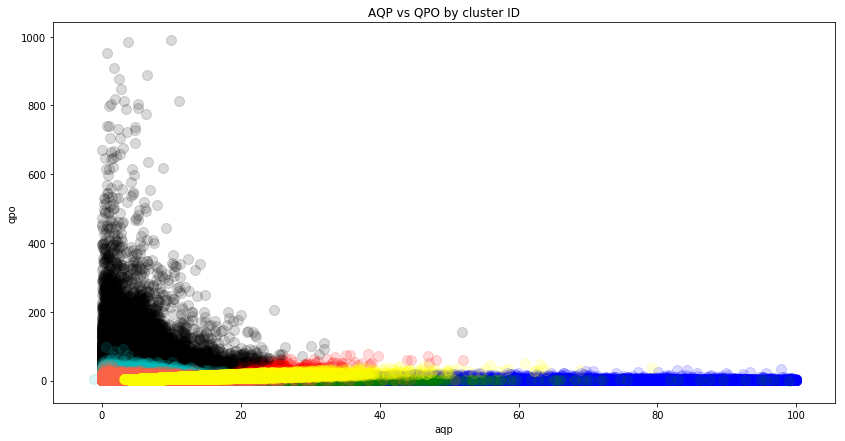

In [78]:
#Plot the outputs 2 dimensions at a time:
#ABP vs BPO
plt.figure(figsize=(14,7))
plt.scatter(df.aqp[df.cluster_id ==0], df.qpo[df.cluster_id ==0], s=100, c='red',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==1], df.qpo[df.cluster_id ==1], s=100, c='black',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==2], df.qpo[df.cluster_id ==2], s=100, c='blue',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==3], df.qpo[df.cluster_id ==3], s=100, c='c',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==4], df.qpo[df.cluster_id ==4], s=100, c='g',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==5], df.qpo[df.cluster_id ==5], s=100, c='tomato',alpha=0.15)
plt.scatter(df.aqp[df.cluster_id ==6], df.qpo[df.cluster_id ==6], s=100, c='yellow',alpha=0.15)
plt.xlabel('aqp')
plt.ylabel('qpo')
plt.title('AQP vs QPO by cluster ID')
plt.show();

In [160]:
#Plot the outputs 2 dimensions at a time:
#unique skus vs orders
plt.figure(figsize=(14,7))
plt.scatter(df.orders[df.cluster_id ==0], df.pc_unique_skus[df.cluster_id ==0], s=100, c='red',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==1], df.pc_unique_skus[df.cluster_id ==1], s=100, c='black',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==2], df.pc_unique_skus[df.cluster_id ==2], s=100, c='blue',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==3], df.pc_unique_skus[df.cluster_id ==3], s=100, c='c',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==4], df.pc_unique_skus[df.cluster_id ==4], s=100, c='g',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==5], df.pc_unique_skus[df.cluster_id ==5], s=100, c='tomato',alpha=0.15)
plt.scatter(df.orders[df.cluster_id ==6], df.pc_unique_skus[df.cluster_id ==6], s=100, c='yellow',alpha=0.15)
plt.xlabel('orders')
plt.ylabel('pc_unique_skus')
plt.title('Orders vs pc_unique_skus by cluster ID')
plt.show();

In [80]:
#Aggregate the data by cluster_id

aggregations = {
    'orders': {
        'customers': 'count',
        'med_orders':'median',
        'mean_orders': 'mean',
        #'mean_orders':'mean',
        'std_orders': 'std'
    },
    'aqp': {
        'med_aqp':'median',
        #'mean_abp':'mean',
        'std_aqp':'std'
    },
    'qpo': {
        'med_qpo':'median',
        #'mean_bpo':'mean',
        'std_qpo':'std'
    },
    'pc_unique_skus': {
        'med_pc_unique':'median',
        #'mean_bpo':'mean',
        #'std_pc_unique':'std'
    },
    'pc_orders_with_voucher': {
        'med_voucher_pc':'median',
        #'mean_bpo':'mean',
        #'std_voucher_pc':'std'
    },
    'pc_event_orders': {
        'med_pc_event':'median',
        #'mean_bpo':'mean',
        #'std_pc_event':'std'
    },
}

#Output the data, sort and round as required
df_final.groupby('cluster_id').agg(aggregations).round(1).sort_values(by=[('qpo','med_qpo')]) #multi-level column names

C:\Users\jaylward\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


orders                                       aqp          \
           customers med_orders mean_orders std_orders med_aqp std_aqp   
cluster_id                                                               
6              54094        4.0         5.7        3.7    27.0    21.1   
0              26628        9.0        10.7        7.0     9.5     7.2   
4              26597       16.0        19.1       13.6     3.4     3.7   
2              31323        4.0         4.7        2.0    10.9     5.7   
3              37376        9.0         9.6        5.3     2.6     2.3   
5              37624        4.0         4.8        2.1     6.9     3.7   
1              73254        4.0         5.0        2.6     2.8     2.8   

               qpo         pc_unique_skus pc_orders_with_voucher  \
           med_qpo std_qpo  med_pc_unique         med_voucher_pc   
cluster_id                                                         
6              2.3     2.3            0.7                    0.0   
0              3.6     2.5            0.4                    0.0   
4              5.2     4.2            0.2                    0.0   
2              7.2     4.0            0.2                    0.0   
3             10.6     6.6            0.1                    0.0   
5             13.0     6.6            0.2                    0.0   
1             28.2    41.6            0.1                    0.0   

           pc_event_orders  
              med_pc_event  
cluster_id                  
6                      0.0  
0                      0.0  
4                      0.0  
2                      0.0  
3                      0.0  
5                      0.0  
1                      0.0